In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Breast_Cancer.csv',encoding='latin1') 

In [3]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

# Data Cleaning

In [5]:
print(df.isnull().sum())  ##no null values

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64


In [6]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Status']=encoder.fit_transform(df['Status'])
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,0
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,0
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,0
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,0
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,0


In [7]:
df['Race'].value_counts()

Race
White    3413
Other     320
Black     291
Name: count, dtype: int64

In [8]:
df['Marital Status'].value_counts()

Marital Status
Married      2643
Single        615
Divorced      486
Widowed       235
Separated      45
Name: count, dtype: int64

In [9]:
df['Marital Status']=df['Marital Status'].replace('Divorced','Separated')

In [10]:
df['differentiate'].value_counts()

differentiate
Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: count, dtype: int64

In [11]:
df['A Stage'].value_counts()

A Stage
Regional    3932
Distant       92
Name: count, dtype: int64

In [12]:
df['Estrogen Status'].value_counts()

Estrogen Status
Positive    3755
Negative     269
Name: count, dtype: int64

In [13]:
df['Progesterone Status'].value_counts()

Progesterone Status
Positive    3326
Negative     698
Name: count, dtype: int64

In [14]:
df['Status'].value_counts()

Status
0    3408
1     616
Name: count, dtype: int64

# EDA

<Axes: xlabel='Age', ylabel='Count'>

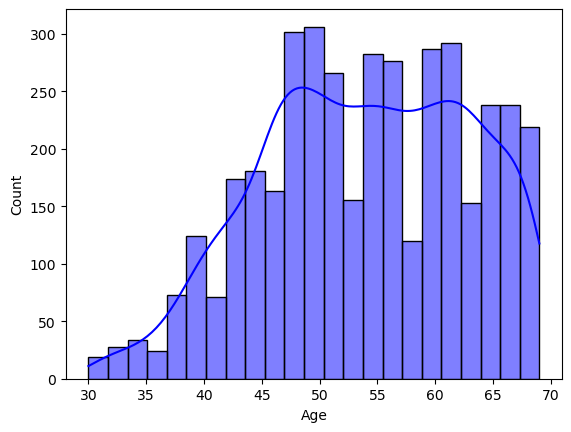

In [15]:
#Distribution, skewness, outliers
sns.histplot(data=df, x='Age', kde=True,color="blue")

<Axes: xlabel='Tumor Size'>

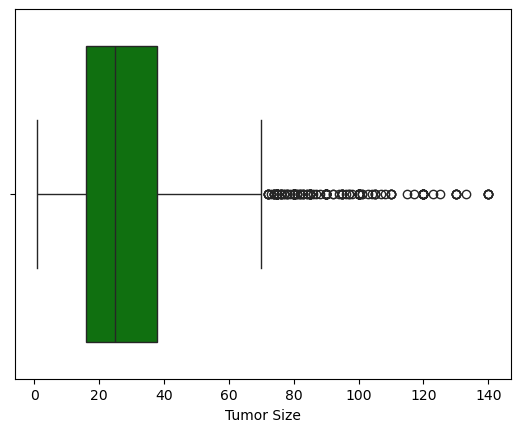

In [16]:
sns.boxplot(x='Tumor Size', data=df,color="green")

<Axes: xlabel='Status', ylabel='Age'>

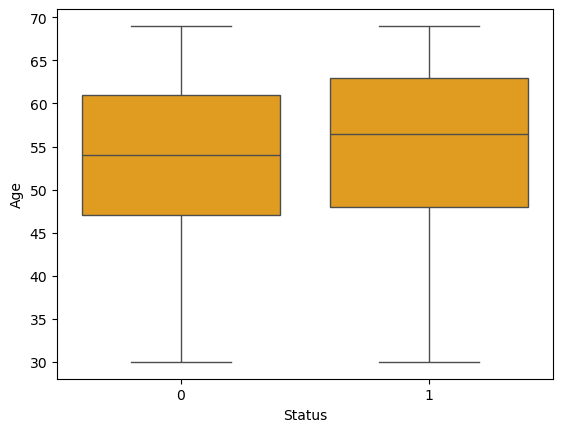

In [17]:
sns.boxplot(x='Status', y='Age', data=df,color="orange")

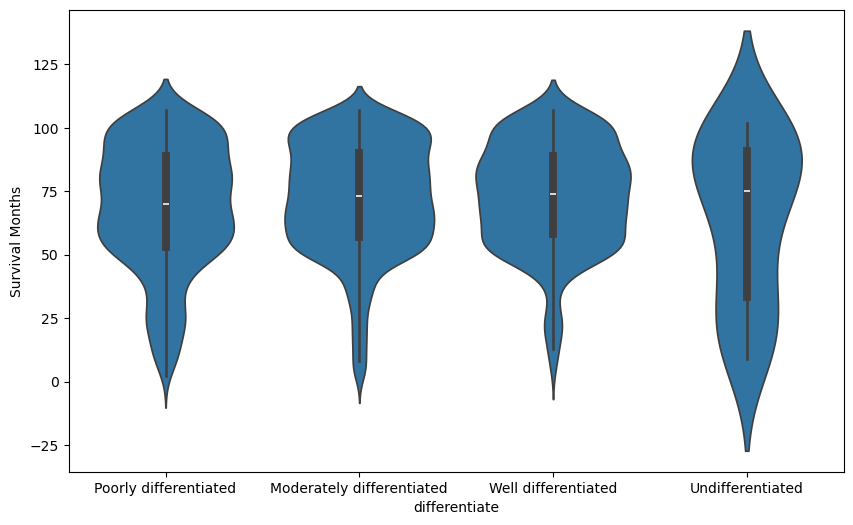

In [18]:
plt.figure(figsize=(10,6))
sns.violinplot(x='differentiate', y='Survival Months', data=df)
plt.show()

<Axes: xlabel='Grade'>

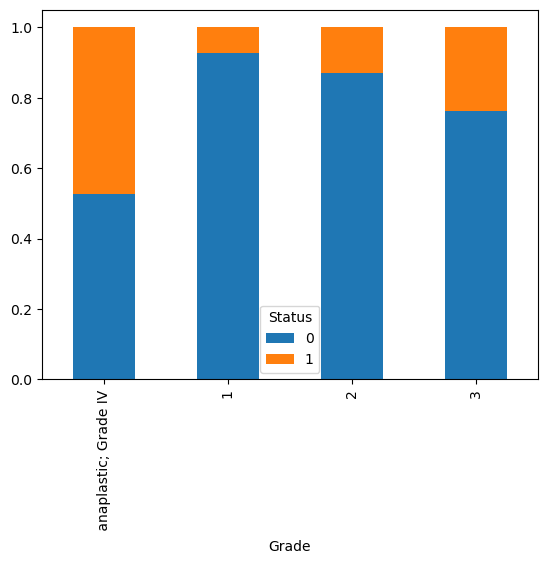

In [19]:
pd.crosstab(df['Grade'], df['Status'], normalize='index').plot(kind='bar', stacked=True)


<Axes: xlabel='Tumor Size', ylabel='Survival Months'>

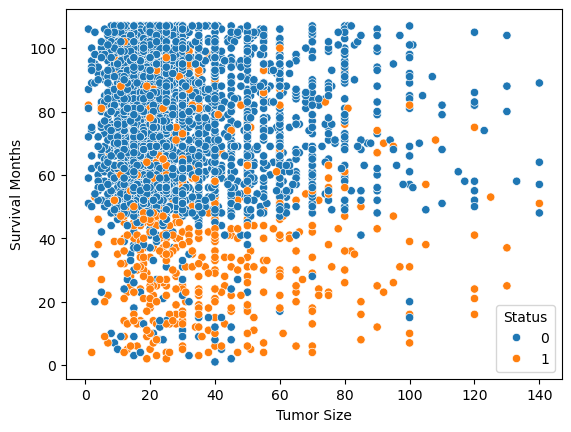

In [20]:
sns.scatterplot(x='Tumor Size', y='Survival Months', hue='Status', data=df)

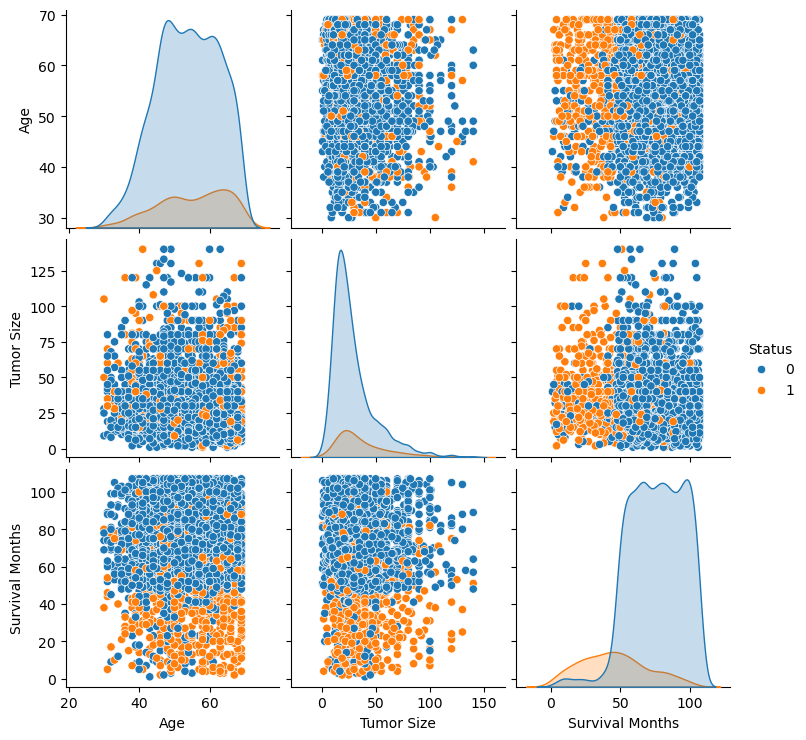

In [21]:
sns.pairplot(df, vars=['Age', 'Tumor Size', 'Survival Months'], hue='Status')

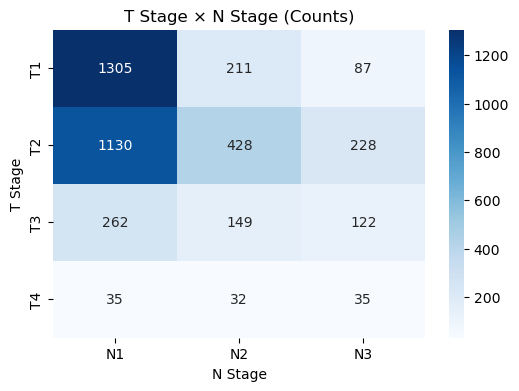

In [22]:
plt.figure(figsize=(6,4))
crosstab_tn = pd.crosstab(df['T Stage '], df['N Stage'])
sns.heatmap(crosstab_tn, annot=True, fmt='d', cmap='Blues')
plt.title('T Stage × N Stage (Counts)')
plt.ylabel('T Stage')
plt.xlabel('N Stage')
plt.show()  #Show how primary tumor stage relates to node stage

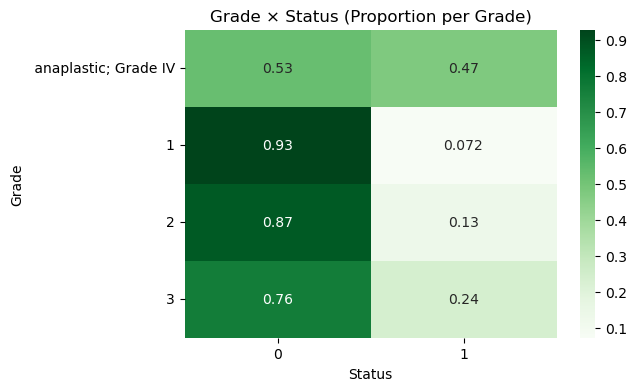

In [23]:
plt.figure(figsize=(6,4))
crosstab_grade_status = pd.crosstab(df['Grade'], df['Status'], normalize='index')
sns.heatmap(crosstab_grade_status, annot=True, cmap='Greens')
plt.title('Grade × Status (Proportion per Grade)')
plt.ylabel('Grade')
plt.xlabel('Status')
plt.show()  #Shows how outcomes (alive/dead) vary per tumor grade

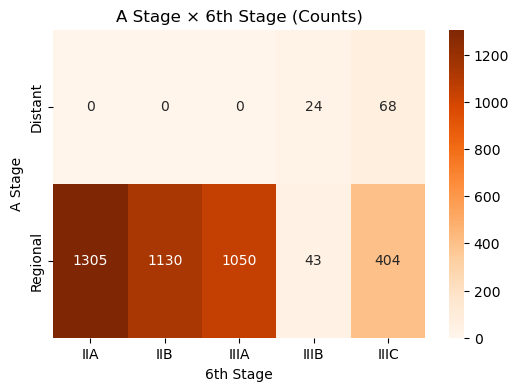

In [24]:
plt.figure(figsize=(6,4))
crosstab_a6 = pd.crosstab(df['A Stage'], df['6th Stage'])
sns.heatmap(crosstab_a6, annot=True, fmt='d', cmap='Oranges')
plt.title('A Stage × 6th Stage (Counts)')
plt.ylabel('A Stage')
plt.xlabel('6th Stage')
plt.show()  #See how AJCC stage overlaps with 6th edition stage

## Feature Encoding

In [25]:
####numeric Features
num_features=[feature for feature in df.columns if df[feature].dtype!='O']
print('Num of numerical Features:',len(num_features))

Num of numerical Features: 6


In [26]:
##Categorical Features
cat_features=[feature for feature in df.columns if df[feature].dtype=='O']
print('Num of categorical Features:',len(cat_features))

Num of categorical Features: 10


In [27]:
##Discrete Features
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features:',len(discrete_features))

Num of Discrete Features: 1


In [28]:
#cont Features
continuous_features=[feature for feature in num_features if len(df[feature].unique())>25]
print('Num of continuous Features:',len(continuous_features))

Num of continuous Features: 5


In [29]:
#selection dependent and independent features
X=df.drop(['Status'],axis=1)
y=df['Status']

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape,X_test.shape

((3018, 15), (1006, 15))

In [32]:
# Create Column Transformer with 3 types of transformers
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
         ("OneHotEncoder", oh_transformer, cat_features),
          ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [33]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Estrogen Status',
       'Progesterone Status'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive',
       'Survival Months'],
      dtype='object'))])

In [34]:
#transformation for training dataset(fit_transform)
X_train=preprocessor.fit_transform(X_train)

In [35]:
#apply transformation on test data using transform
X_test=preprocessor.transform(X_test)

# Model Fitting

In [36]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,f1_score,roc_curve,roc_auc_score

In [38]:
models={
    "Logisitic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "XGboost":XGBClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

Logisitic Regression
Model performance for Training set
- Accuracy: 0.8933
- F1 score: 0.8809
- Precision: 0.7786
- Recall: 0.4461
- Roc Auc Score: 0.7113
----------------------------------
Model performance for Test set
- Accuracy: 0.9026
- F1 score: 0.8908
- Precision: 0.7778
- Recall: 0.4406
- Roc Auc Score: 0.7099
KNN
Model performance for Training set
- Accuracy: 0.8993
- F1 score: 0.8854
- Precision: 0.8449
- Recall: 0.4376
- Roc Auc Score: 0.7114
----------------------------------
Model performance for Test set
- Accuracy: 0.8996
- F1 score: 0.8856
- Precision: 0.7838
- Recall: 0.4056
- Roc Auc Score: 0.6935
Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8360
- F1 score: 0.8429
- Precision: 0.4375
- Recall: 0.5385
- Roc Auc Score: 0.7119
Random Forest
Model performance for Training set
- Accuracy: 1.0

In [39]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}
xgboost_params={"learning_rate":[0.1,0.01],
                "max_depth": [5, 8, 12,20,30],
                "n_estimators":[100,200,300],
                "colsample_bytree":[0.5,0.8,1,0.3,0.4]}

In [40]:
# Models list for Hyperparameter tuning
randomcv_models = [("RF", RandomForestClassifier(), rf_params),
                   ("XGB",XGBClassifier(),xgboost_params)
                  ]

In [41]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'min_samples_split': 8, 'max_features': 8, 'max_depth': 10}
---------------- Best Params for XGB -------------------
{'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.4}


In [42]:
models={
    "Random Forest":RandomForestClassifier(n_estimators=500,min_samples_split=20, max_features=8,max_depth=None),
    "XGBoost":XGBClassifier(n_estimators=300,max_depth=5,learning_rate=0.01,colsample_bytree=0.4)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 0.9231
- F1 score: 0.9156
- Precision: 0.9057
- Recall: 0.5687
- Roc Auc Score: 0.7789
----------------------------------
Model performance for Test set
- Accuracy: 0.9135
- F1 score: 0.9062
- Precision: 0.7917
- Recall: 0.5315
- Roc Auc Score: 0.7541


XGBoost
Model performance for Training set
- Accuracy: 0.9152
- F1 score: 0.9032
- Precision: 0.9502
- Recall: 0.4841
- Roc Auc Score: 0.7397
----------------------------------
Model performance for Test set
- Accuracy: 0.9115
- F1 score: 0.8987
- Precision: 0.8750
- Recall: 0.4406
- Roc Auc Score: 0.7151




In [43]:
##rf works better on test data after hyper parameter tuning
##xgboost was working better with its default parameter

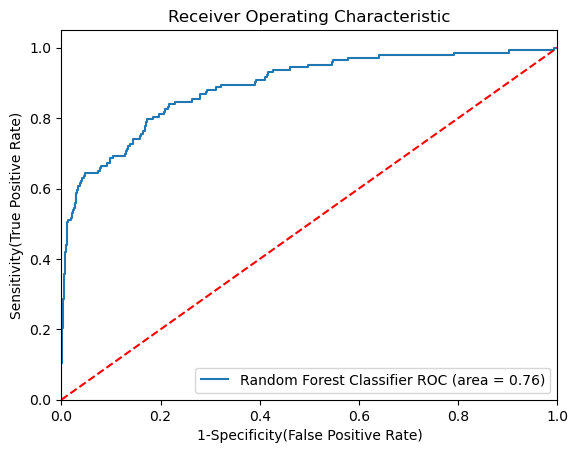

In [44]:
## Plot ROC AUC Curve for Random forest
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=500,min_samples_split=20, max_features=8,max_depth=None),
    'auc':  0.7582
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 

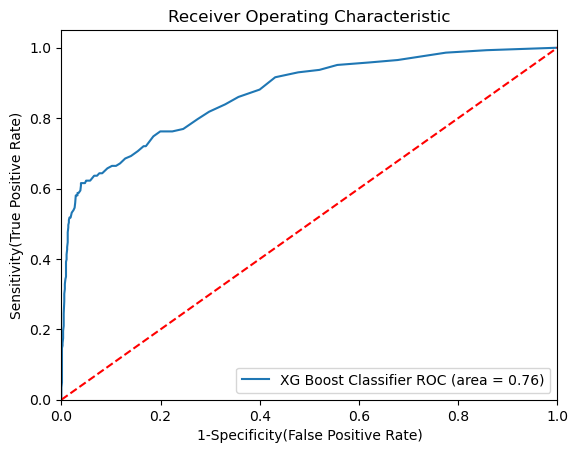

In [45]:
## Plot ROC AUC Curve for XGBoost
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'XG Boost Classifier',
    'model': RandomForestClassifier(),
    'auc':  0.7617
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 

In [2]:
# changing...

In [3]:
# my name is Radhey Shikta.....